## Data Loadout

In [3]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
#Importing dataset

In [5]:
lol_df = pd.read_csv('games.csv')
lol_df2 = lol_df[['gameDuration', 'winner','firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills']]
lol_X = lol_df2[['gameDuration', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills']]
lol_X = np.array(lol_X)
lol_Y = lol_df2[['winner']]
lol_Y = np.array(lol_Y)

In [6]:
#scaling

In [7]:
lol_X_scale = preprocessing.scale(lol_X)
X_train, X_test, y_train, y_test = train_test_split(lol_X_scale, lol_Y, test_size = 0.25, train_size = 0.75, random_state = 42)
#y_2d_train = y_train.reshape(y_train.shape[0], 1)
#y_2d_test = y_test.reshape(y_test.shape[0], 1)

In [8]:
#SVM Linear Kernel

In [21]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]

In [50]:
from sklearn import svm

# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_linear(cVals):
    for i in cVals:
        print("C value = %f" % i)
        # TODO - Create an object of svm.SVC(probability = False, kernel = 'linear', C = c) - 5 points
        svc_linear = svm.SVC(probability = False, kernel = 'linear', C=i)

        # TODO - Fit the classifier on the training set - 5 points
        svc_linear.fit(X_train, y_train.ravel())

        # TODO - Find the prediction and accuracy on the training set - 5 points
        Yhat_svc_linear_train = svc_linear.predict(X_train)
        acc_train = svc_linear.score(X_train, y_train.ravel())

        # Adding testing accuracy to acc_train_svm
        acc_train_svm_linear.append(acc_train)
        print('Train Accuracy = {0:f}'.format(acc_train))

        # TODO - Find the prediction and accuracy on the test set - 5 points
        Yhat_svc_linear_test = svc_linear.predict(X_test)
        acc_test = svc_linear.score(X_test, y_test.ravel())

        # Adding testing accuracy to acc_test_svm
        acc_test_svm_linear.append(acc_test)
        print('Test Accuracy = {0:f}'.format(acc_test))

        # Appending value of c for graphing purposes
        c_svm_linear.append(c)

        w_svc_linear = svc_linear.coef_
        intercept_svc_linear = svc_linear.intercept_
        w_svc_linear = np.concatenate([intercept_svc_linear,w_svc_linear.flatten()])
        #print(w_svc_linear)
        
        plt.plot(w_svc_linear)
        plt.xlabel('Coefficient Number')
        plt.ylabel('Coefficient Value')
        plt.legend(['C = 0.000001', 'C = 0.00001', 'C = 0.0001', 'C = 0.001', 'C = 0.01', 'C = 0.1', 'C = 1', 'C = 10'], loc='lower right')
    plt.show()
    

C value = 0.000100
Train Accuracy = 0.944299
Test Accuracy = 0.946632
C value = 0.001000
Train Accuracy = 0.958697
Test Accuracy = 0.959450
C value = 0.010000
Train Accuracy = 0.961131
Test Accuracy = 0.962091
C value = 0.100000
Train Accuracy = 0.960872
Test Accuracy = 0.961470
C value = 1.000000
Train Accuracy = 0.961002
Test Accuracy = 0.961159
C value = 10.000000
Train Accuracy = 0.961002
Test Accuracy = 0.961159


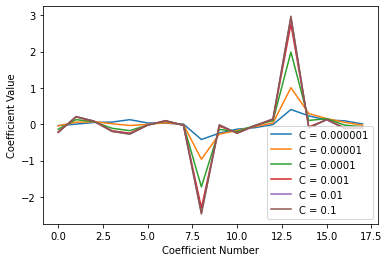

In [51]:
# Call the above function i.e. svm_linear with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
svm_linear(cVals)

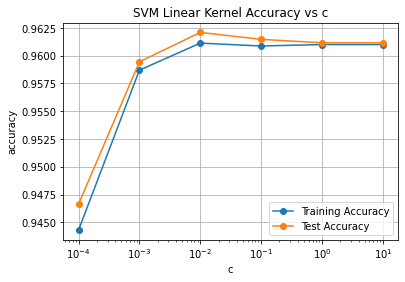

In [19]:
# TODO - Write code to plot 2 plots - 10 points
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.xlabel('c')
plt.ylabel('accuracy')
plt.plot(c_svm_linear, acc_train_svm_linear, '-o')
plt.plot(c_svm_linear, acc_test_svm_linear, '-o')
plt.xscale('log')
plt.title("SVM Linear Kernel Accuracy vs c")
# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.grid()
plt.show(block=False)



In [20]:
#SVM Radial

In [21]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

In [22]:
from sklearn import svm

# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_rbf(c):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'rbf', C = c) - 5 points
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    
    # TODO - Fit the classifier on the training set - 5 points
    svc_rbf.fit(X_train, y_train.ravel())
    
    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train = svc_rbf.score(X_train, y_train.ravel())
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test = svc_rbf.score(X_test, y_test.ravel())
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_rbf.append(c)

In [ ]:
for c in cVals:
    svm_rbf(c)

In [ ]:
# TODO - Write code to plot 2 plots - 10 points
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.xlabel('c')
plt.ylabel('accuracy')
plt.plot(c_svm_rbf, acc_train_svm_rbf, '-o')
plt.plot(c_svm_rbf, acc_test_svm_rbf, '-o')
plt.xscale('log')
plt.title("SVM RBF Kernel Accuracy vs c")
# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')
plt.grid()
plt.show(block=False)

In [ ]:
#SVM Polynomial

In [ ]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

In [ ]:
def svm_polynomial(c):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'poly', C = c) - 5 points
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C=c)
    
    A = X_train[0:300,:]  # First 300 rows of training set.
    B = Y_train[0:300]  
    C = X_test[0:100,:]   # First 100 rows of test set.
    D = Y_test[0:100]
    
    # TODO - Fit the classifier on the training set - 5 points
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(A, B.ravel())
    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_poly_train = svc_polynomial.predict(A)
    acc_train = svc_polynomial.score(A, B.ravel())
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_poly_test = svc_polynomial.predict(C)
    acc_test = svc_polynomial.score(C, D.ravel())
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_poly.append(c)

In [ ]:
# Call the above function i.e. svm_poly with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
# Redefining cVals because poly takes a long time to run with larger values of c since 
# the larger the value of c, the lesser the amount of regulatization
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    svm_polynomial(c)

In [ ]:
# TODO - Write code to plot 2 plots - 10 points
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.xlabel('c')
plt.ylabel('accuracy')
plt.plot(c_svm_poly, acc_train_svm_poly, '-o')
plt.plot(c_svm_poly, acc_test_svm_poly, '-o')
plt.xscale('log')
plt.title("SVM Polynomial Kernel Accuracy vs c")
# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.grid()
plt.show(block=False)